O efeito Magnus é quando um obejto giratório se desloca em meio de um fluido.Esse efeito é responsável por desviar a trajetória do objeto em direção a um lado devido à interação entre a rotação do objeto e o fluxo do fluido.

Uma curiosidade sobre esse trabalho é que sempre me lembro do Roberto Carlos cobrando aquela falta incrível contra a França. A curva impressionante que a bola fez naquele chute é um exemplo clássico do efeito Magnus e mostra como a física está presente até nas jogadas mais memoráveis do futebol.

In [27]:
import numpy as np

In [28]:
#Parâmetros
m = 0.43  #Massa da bola (kg)
r = 0.11  #Raio da bola (m)
A = np.pi * r**2  #Área transversal
rho = 1.2  #Densidade do ar
Cd = 0.47  #Coeficiente de arrasto
CL = 0.2  #Coeficiente Magnus
omega = np.array([0, 0, 50])  #Vetor de rotação angular(rad/s)
g = np.array([0, 0, -9.81])  #Gravidade

In [29]:
def forca_gravitacional():
    return m * g

def forca_arrasto(vel):
    vel_magnitude = np.linalg.norm(vel)
    return -0.5 * Cd * rho * A * vel_magnitude * vel

def forca_magnus(vel):
    return 0.5 * CL * rho * A * np.cross(omega, vel)

In [30]:
#Velocidade do objeto
vel = np.array([30, 0, 10])

grav = forca_gravitacional()
arrasto = forca_arrasto(vel)
magnus = forca_magnus(vel)

#Mostrando os resultados
print(f"Força Gravitacional: {grav} N")
print(f"Força de Arrasto: {arrasto} N")
print(f"Força de Magnus: {magnus} N")

Força Gravitacional: [ 0.      0.     -4.2183] N
Força de Arrasto: [-10.16964062  -0.          -3.38988021] N
Força de Magnus: [0.        6.8423888 0.       ] N


In [31]:
#Modelando a tragetória da curva

def sistema_edos(t, y):
    pos = y[:3]
    vel = y[3:]

    #Forças
    f_grav = forca_gravitacional()
    f_arr = forca_arrasto(vel)
    f_magnus = forca_magnus(vel)

    #Equações diferenciais
    dpos_dt = vel
    dvel_dt = (f_grav + f_arr + f_magnus) / m

    return np.concatenate((dpos_dt, dvel_dt))

In [32]:
#Condições iniciais
y0 = np.array([0, 0, 0, 10, 0, 0])  #posição inicial (0, 0, 0) e velocidade inicial (10, 0, 0)

#Intervalo de tempo
t_span = (0, 2)  # de 0 a 2 segundos
t_eval = np.linspace(t_span[0], t_span[1], 100)  #100 pontos de tempo para avaliação

#Resolvendo o sistema de EDOs
sol = solve_ivp(sistema_edos, t_span, y0, t_eval=t_eval)

pos = sol.y[:3].T
vel = sol.y[3:].T

#Mostrando os resultados
print(f"Posições:\n{pos}")
print(f"Velocidades:\n{vel}")

Posições:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.01509319e-01  1.07874369e-03 -1.99848778e-03]
 [ 4.01988141e-01  4.30047578e-03 -7.98065672e-03]
 [ 6.01423223e-01  9.64348817e-03 -1.79267616e-02]
 [ 7.99801215e-01  1.70861137e-02 -3.18171817e-02]
 [ 9.97109310e-01  2.66067338e-02 -4.96313316e-02]
 [ 1.19333343e+00  3.81839336e-02 -7.13505185e-02]
 [ 1.38845912e+00  5.17962456e-02 -9.69565863e-02]
 [ 1.58247191e+00  6.74220978e-02 -1.26431313e-01]
 [ 1.77535736e+00  8.50398138e-02 -1.59756412e-01]
 [ 1.96710101e+00  1.04627613e-01 -1.96913529e-01]
 [ 2.15768842e+00  1.26163611e-01 -2.37884245e-01]
 [ 2.34710514e+00  1.49625818e-01 -2.82650076e-01]
 [ 2.53533671e+00  1.74992140e-01 -3.31192469e-01]
 [ 2.72236871e+00  2.02240380e-01 -3.83492809e-01]
 [ 2.90818669e+00  2.31348236e-01 -4.39532413e-01]
 [ 3.09277622e+00  2.62293300e-01 -4.99292533e-01]
 [ 3.27612286e+00  2.95053062e-01 -5.62754355e-01]
 [ 3.45821217e+00  3.29604906e-01 -6.29898998e-01]
 [ 3.63902974e+00  3.

In [33]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Condições iniciais
pos_inicial = np.array([0, 0, 0])  #Posição inicial (m)
vel_inicial = np.array([30, 0, 10])  #Velocidade inicial (m/s)
y0 = np.concatenate((pos_inicial, vel_inicial))  #Vetor inicial

#Tempo de simulação
tempo = (0, 10)   #De 0 a 10 segundos

#Solução numérica
sol = solve_ivp(sistema_edos, tempo, y0, t_eval=np.linspace(0, 5, 500))

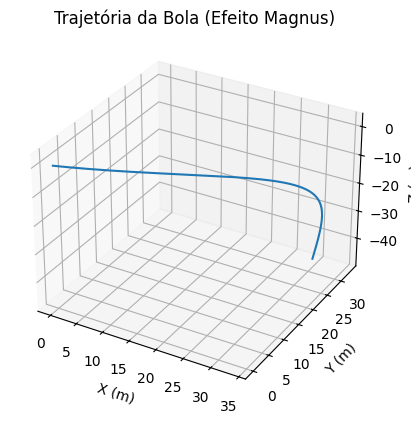

In [34]:
#Extrair posição
x, y, z = sol.y[:3]

#Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
ax.set_title("Trajetória da Bola (Efeito Magnus)")
plt.show()


O efeito Magnus é influenciado por diversos fatores que moldam a trajetória de um objeto em movimento. Refletir sobre esses parâmetros ajuda a entender como o fenômeno funciona e a ajustar modelos que o representam.

A velocidade inicial é um dos aspectos mais importantes. Quando um objeto se desloca mais rápido, a força de Magnus também aumenta, fazendo com que a curva na trajetória seja mais acentuada. Porém, em velocidades muito altas, o ar ao redor pode ficar turbulento, o que diminui o efeito. É por isso que, em esportes como o futebol, a força aplicada no chute precisa ser bem dosada para gerar aquela curva perfeita sem perder o controle.

Já a velocidade angular, ou seja, a rotação do objeto, define a intensidade do desvio. Quanto mais rápida a rotação, maior é o desvio causado pelo efeito Magnus. Isso é o que vemos em chutes com efeito no futebol ou em arremessos no tênis, onde a rotação adiciona imprevisibilidade à trajetória. Mas, se a rotação for excessiva, pode ser difícil controlar o resultado final.

A massa do objeto também faz diferença. Objetos mais leves, como bolas de praia, são facilmente desviados pelo efeito Magnus, enquanto objetos pesados tendem a seguir trajetórias mais lineares. É por isso que uma bola de futebol se comporta de forma muito diferente de um projétil pesado.

Outro ponto importante é a densidade do fluido, como o ar. Em altitudes mais altas, onde o ar é menos denso, o efeito Magnus é reduzido, o que impacta diretamente em esportes como futebol. Já em meios mais densos, como a água, o efeito é muito mais intenso, criando desvios bem mais perceptíveis.

A área do objeto também influencia: superfícies maiores interagem mais com o fluido, aumentando a força de Magnus. Porém, a resistência do ar age como uma barreira, desacelerando o objeto e reduzindo a força ao longo do tempo. Isso é visível em esportes como o golfe, onde a resistência do ar limita o alcance das curvas.

Por último, temos a gravidade, que puxa o objeto para baixo, enquanto o efeito Magnus atua lateralmente. Em ambientes com gravidade mais baixa, como na Lua, a curva gerada pelo efeito Magnus seria muito mais acentuada, já que o peso do objeto não interferiria tanto.

Esses fatores trabalham juntos para determinar como um objeto se comporta ao se mover e girar em um fluido. É fascinante ver como mudanças pequenas em parâmetros como velocidade, rotação ou densidade podem transformar a trajetória completamente. Esse entendimento é valioso, seja para criar jogadas incríveis em esportes, projetar equipamentos ou até mesmo explorar fenômenos naturais.